# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

from typing import List


import os
import datetime

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from IPython.display import display
pd.options.display.max_columns = None

# hide warnings
import warnings
warnings.filterwarnings('ignore')


# Data Understanding and Exploration

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,Gas

In [4]:
df.shape

(1460, 81)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

### `Finding the percentage of missing values (Highest to Lowest)`

In [6]:
x = (df.isnull().sum()/len(df))*100
x.sort_values(ascending = False)

#Finding the columns where atleast one value is missing.
x[x > 0.00].sort_values(ascending = False)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

In [7]:
# df[df.PoolQC.notnull()].astype('category').value_counts()
df.PoolQC.astype('category').value_counts()

Gd    3
Fa    2
Ex    2
Name: PoolQC, dtype: int64

### `Dropping columns where missing value percentage is greater than 15%`

In [8]:
df.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage'], axis=1, inplace=True)

In [9]:
x = (df.isnull().sum()/len(df))*100
x.sort_values(ascending = False)

#Finding the columns where atleast one value is missing.
x[x > 0.00].sort_values(ascending = False)

GarageCond      5.547945
GarageQual      5.547945
GarageFinish    5.547945
GarageYrBlt     5.547945
GarageType      5.547945
BsmtFinType2    2.602740
BsmtExposure    2.602740
BsmtFinType1    2.534247
BsmtCond        2.534247
BsmtQual        2.534247
MasVnrArea      0.547945
MasVnrType      0.547945
Electrical      0.068493
dtype: float64

#### `Imputing the Missing Values` - `Categorical Valriables`

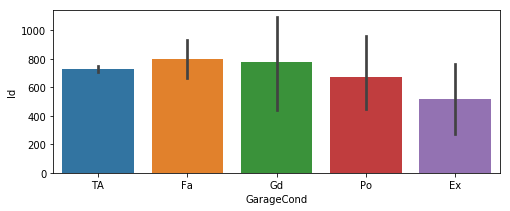

In [10]:
df['GarageCond'].fillna(df['GarageCond'].mode()[0], inplace=True)
df['GarageCond'].astype('category').value_counts()

plt.figure(figsize =(8,3))
sns.barplot(x="GarageCond", y="Id", data=df)

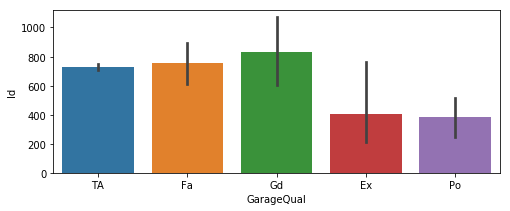

In [11]:
df['GarageQual'].fillna(df['GarageQual'].mode()[0], inplace=True)
df['GarageQual'].astype('category').value_counts()

plt.figure(figsize =(8,3))
sns.barplot(x="GarageQual", y="Id", data=df)

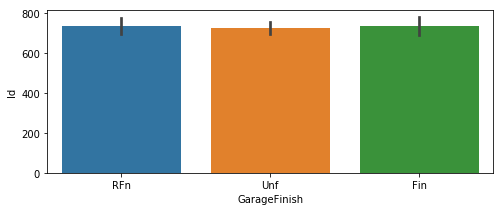

In [12]:
df['GarageFinish'].fillna(df['GarageFinish'].mode()[0], inplace=True)
df['GarageFinish'].astype('category').value_counts()

plt.figure(figsize =(8,3))
sns.barplot(x="GarageFinish", y="Id", data=df)

In [13]:
df['GarageYrBlt'].fillna(df['GarageYrBlt'].mode()[0], inplace=True)
df['GarageYrBlt'].astype('category').value_counts().head()

2005.0    146
2006.0     59
2004.0     53
2003.0     50
2007.0     49
Name: GarageYrBlt, dtype: int64

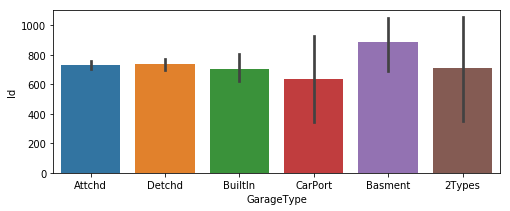

In [14]:
df['GarageType'].fillna(df['GarageType'].mode()[0], inplace=True)
df['GarageType'].astype('category').value_counts()


plt.figure(figsize =(8,3))
sns.barplot(x="GarageType", y="Id", data=df)

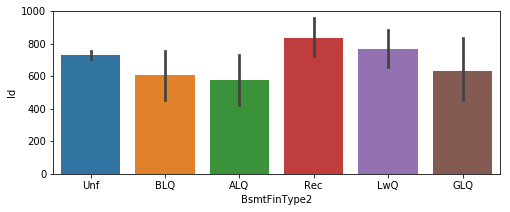

In [15]:
df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0], inplace=True)
df['BsmtFinType2'].astype('category').value_counts()


plt.figure(figsize =(8,3))
sns.barplot(x="BsmtFinType2", y="Id", data=df)

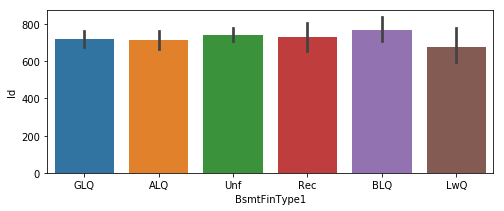

In [16]:
df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0], inplace=True)
df['BsmtFinType1'].astype('category').value_counts()


plt.figure(figsize =(8,3))
sns.barplot(x="BsmtFinType1", y="Id", data=df)

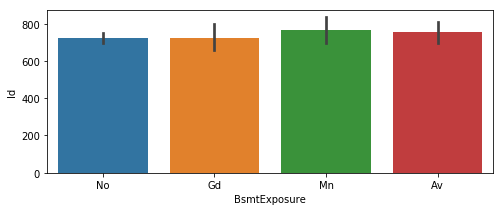

In [17]:
df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0], inplace=True)
df['BsmtExposure'].astype('category').value_counts()


plt.figure(figsize =(8,3))
sns.barplot(x="BsmtExposure", y="Id", data=df)

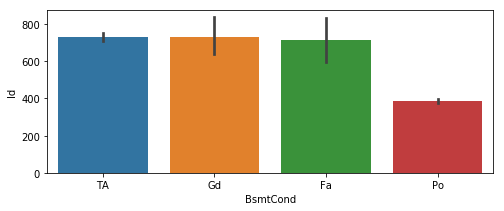

In [18]:
df['BsmtCond'].fillna(df['BsmtCond'].mode()[0], inplace=True)
df['BsmtCond'].astype('category').value_counts()


plt.figure(figsize =(8,3))
sns.barplot(x="BsmtCond", y="Id", data=df)

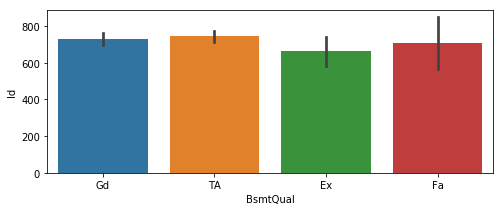

In [19]:
df['BsmtQual'].fillna(df['BsmtQual'].mode()[0], inplace=True)
df['BsmtQual'].astype('category').value_counts()


plt.figure(figsize =(8,3))
sns.barplot(x="BsmtQual", y="Id", data=df)

In [20]:
df['MasVnrArea'].fillna(df['MasVnrArea'].mode()[0], inplace=True)
df['MasVnrArea'].astype('category').value_counts().head()

0.0      869
108.0      8
72.0       8
180.0      8
120.0      7
Name: MasVnrArea, dtype: int64

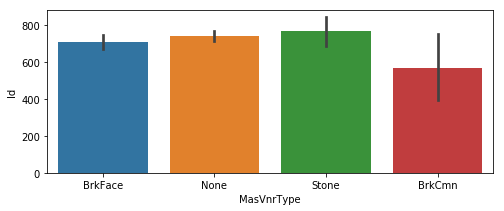

In [21]:
df['MasVnrType'].fillna(df['MasVnrType'].mode()[0], inplace=True)
df['MasVnrType'].astype('category').value_counts()


plt.figure(figsize =(8,3))
sns.barplot(x="MasVnrType", y="Id", data=df)

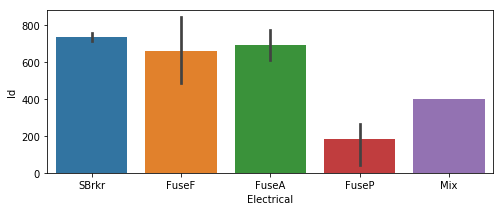

In [22]:
df['Electrical'].fillna(df['Electrical'].mode()[0], inplace=True)
df['Electrical'].astype('category').value_counts()


plt.figure(figsize =(8,3))
sns.barplot(x="Electrical", y="Id", data=df)

In [23]:
x = (df.isnull().sum()/len(df))*100
x.sort_values(ascending = False)

#Finding the columns where atleast one value is missing.
x[x > 0.00].sort_values(ascending = False)

Series([], dtype: float64)

##### `After dropping the columns all the missing values are imputed

### Changing the DataType of few columns from numeric to Object (Categorical)

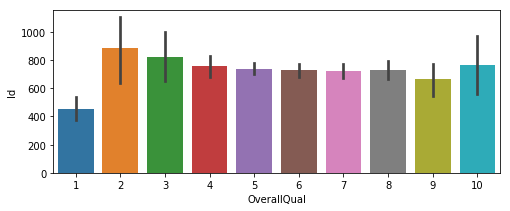

In [24]:
df['OverallQual'].astype('category').value_counts()

plt.figure(figsize =(8,3))
sns.barplot(x="OverallQual", y="Id", data=df)

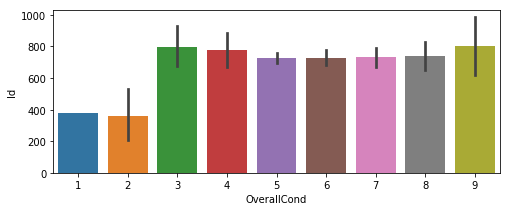

In [25]:
df['OverallCond'].astype('category').value_counts()

plt.figure(figsize =(8,3))
sns.barplot(x="OverallCond", y="Id", data=df)

`Changing the below 2 numerical Variables to categorical variables`

In [26]:
df[['OverallQual','OverallCond']] = df[['OverallQual','OverallCond']].astype(str)

In [27]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'Enclos

In [28]:
df['Years_Diff_YearBuilt'] = df['YrSold'] - df['YearBuilt']
df['Years_Diff_YearRemodAdd'] = df['YrSold'] - df['YearRemodAdd']
df['Years_Diff_GarageYrBlt'] = df['YrSold'] - df['GarageYrBlt']

 #### `Function: Binning the Years - Categorically divind the age of property/assets`

In [29]:
# Dropping the df['YearBuilt', 'Years_Since_Built'] 
df.drop(['YearBuilt', 'YearRemodAdd','GarageYrBlt', 'YrSold', 'MoSold'], axis=1, inplace = True )

# Data Exploration

In [30]:
# all numeric (float and int) variables in the dataset
df_numeric = df.select_dtypes(include=['float64', 'int64'])
df_numeric.head()

,Id,MSSubClass,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,Years_Diff_YearBuilt,Years_Diff_YearRemodAdd,Years_Diff_GarageYrBlt
0,1,60,8450,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,208500,5,5,5.0
1,2,20,9600,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,181500,31,31,31.0
2,3,60,11250,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,223500,7,6,7.0
3,4,70,9550,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,140000,91,36,8.0
4,5,60,14260,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,250000,8,8,8.0


In [31]:
# taking backup of df after data cleaning
df_numeric = df

In [32]:
# Dropping 'Id' column
df_numeric.drop(['Id'], axis=1, inplace=True)

In [33]:
df_numeric.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition,SalePrice,Years_Diff_YearBuilt,Years_Diff_YearRemodAdd,Years_Diff_GarageYrBlt
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,WD,Normal,208500,5,5,5.0
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,WD,Normal,181500,31,31,31.0
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,WD,Normal,223500,7,6,7.0
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,WD,Abnorml,140000,91,36,8.0
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,WD,Normal,250000,8,8,8.0


In [34]:
# plt.figure(figsize=(20,10))
# sns.pairplot((df_numeric))
# plt.show

The pairplot for the numeric variables is hard to analyze due to large number of variables

In [35]:
# # correlation matrix
# cor = df_numeric.corr()
# cor

In [36]:
# # plotting correlations on a heatmap

# # figure size
# plt.figure(figsize=(30,20))

# # heatmap
# sns.heatmap(cor, cmap="YlGnBu", annot=True, annot_kws={"size": 10})
# plt.show()


GarageCars, GarageArea
TotalBsmtSF, 1stFlrSF
OverallQual, SalePrice
TotalRmsAbvGrd, GrLivArea

# Data Preparation

`Spliting Dataset into X and Y`

In [37]:
X= df

In [38]:
y = X.pop('SalePrice')

`Creating dummy variables for categorical variables`

In [39]:
# subset all categorical variables
df_categorical = X.select_dtypes(include=['object'])
df_categorical.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [40]:
df_dummies = pd.get_dummies(df_categorical, drop_first = True)

In [41]:
df_dummies.shape

(1460, 213)

In [42]:
# drop categorical variables 
X = X.drop(list(df_categorical.columns), axis=1)

In [43]:
# concat dummy variables with X
X = pd.concat([X, df_dummies], axis=1)

In [44]:
# scaling the features
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
scaler.fit_transform(X)

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns

X.columns = cols
X.columns

Index(['MSSubClass', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=244)

In [45]:
# split into train and test
# from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

# Performing Regression - Ridge and Lasso

In [46]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 15.0, 20.0, 50.0, 100.0,
 500.0, 600.0, 700.0, 800.0, 900.0, 1000.0]}

### `Ridge Regression`

In [47]:
X_train.info

x = (X_train.isnull().sum()/len(X_train))*100
x.sort_values(ascending = False)

#Finding the columns where atleast one value is missing.
x[x > 0.00].sort_values(ascending = False)

Series([], dtype: float64)

In [48]:
ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 33 candidates, totalling 165 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 165 out of 165 | elapsed:    2.1s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 15.0, 20.0, 50.0, 100.0, 500.0, 600.0, 700.0, 800.0, 900.0, 1000.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [49]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1000]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.010020,0.002532,0.002001,0.001788,0.0001,{'alpha': 0.0001},-16763.045054,-19383.114386,-20190.027375,-20490.583642,-18119.719474,-18987.117523,1384.048490,14,-11145.507369,-10941.361502,-11250.931587,-11384.283278,-10806.466863,-11105.710120,208.246534
1,0.004129,0.008258,0.003126,0.006251,0.001,{'alpha': 0.001},-16687.328843,-19371.109032,-20170.974503,-20393.795983,-18068.929047,-18936.222684,1390.201269,12,-11148.073224,-10941.023725,-11251.233135,-11375.696208,-10818.522450,-11106.909748,202.709269
2,0.006251,0.007656,0.000000,0.000000,0.01,{'alpha': 0.01},-16288.414373,-19308.637282,-20097.064359,-19804.258669,-18025.968054,-18702.501795,1402.178244,10,-11308.026994,-10941.613039,-11374.757279,-11392.463030,-10988.954836,-11201.163036,195.217353
3,0.012090,0.003167,0.002903,0.001561,0.05,{'alpha': 0.05},-16812.600605,-19112.870184,-20711.352812,-19189.169512,-18887.613228,-18940.634960,1246.819628,13,-12255.517522,-10975.648081,-12147.125251,-12126.040781,-11912.934151,-11883.453157,467.286380
4,0.007808,0.004301,0.001101,0.001562,0.1,{'alpha': 0.1},-17682.384253,-19079.410485,-21276.264544,-19217.344519,-19924.645426,-19434.292288,1173.353602,18,-12930.328834,-11021.218454,-12717.939509,-12834.056775,-12621.469970,-12425.002708,709.605709


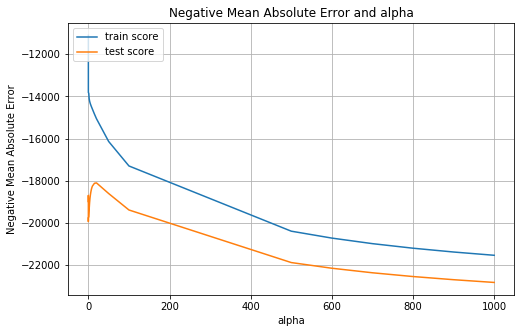

In [50]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.figure(figsize=(8,5))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.grid(True)
plt.show()

`from the graph the optimum value of alpha is 15`

In [51]:
alpha = 15
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
len(sorted(ridge.coef_))

244

In [52]:
ridge_coeff = list(zip(X_train.columns, sorted(abs(ridge.coef_), reverse=True)))
pd.DataFrame(ridge_coeff, columns={'Feature','Coefficient'}).head(20)

,Feature,Coefficient
0,MSSubClass,25988.285136
1,LotArea,22898.700575
2,MasVnrArea,22030.424476
3,BsmtFinSF1,19807.021828
4,BsmtFinSF2,19680.359982
5,BsmtUnfSF,18947.972392
6,TotalBsmtSF,18014.212625
7,1stFlrSF,17592.641216
8,2ndFlrSF,17389.093937
9,LowQualFinSF,16345.465132


### `Lasso`

In [53]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 33 candidates, totalling 165 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 165 out of 165 | elapsed:   24.7s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 15.0, 20.0, 50.0, 100.0, 500.0, 600.0, 700.0, 800.0, 900.0, 1000.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [54]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.175418,0.016490,0.000911,0.000580,0.0001,{'alpha': 0.0001},-16767.812649,-19508.358336,-20144.799866,-20273.132548,-18118.028602,-18960.276926,1338.517112,25,-11144.284626,-10937.226800,-11251.131730,-11386.722575,-10805.366453,-11104.946437,209.853982
1,0.165479,0.011214,0.001103,0.001117,0.001,{'alpha': 0.001},-16767.515928,-19507.887776,-20144.634892,-20279.868787,-18117.191396,-18961.269017,1339.974715,26,-11144.298636,-10937.214341,-11251.139183,-11386.722072,-10805.387585,-11104.952363,209.851369
2,0.172208,0.026658,0.003627,0.006029,0.01,{'alpha': 0.01},-16764.589431,-19503.198879,-20143.025819,-20347.194462,-18111.968318,-18971.831419,1354.388636,28,-11144.501331,-10937.146327,-11251.207587,-11386.782632,-10805.682604,-11105.064096,209.811441
3,0.166437,0.021915,0.001604,0.000585,0.05,{'alpha': 0.05},-16751.856790,-19482.319607,-20135.271629,-20369.109764,-18103.731071,-18966.286762,1361.130876,27,-11145.408836,-10937.129123,-11251.462996,-11387.071130,-10807.099139,-11105.634245,209.557605
4,0.168849,0.009775,0.001305,0.000247,0.1,{'alpha': 0.1},-16735.952691,-19461.338903,-20126.824236,-20366.678994,-18089.508636,-18953.886247,1364.598020,24,-11146.581678,-10937.224230,-11251.812158,-11387.443493,-10808.875872,-11106.387486,209.229900


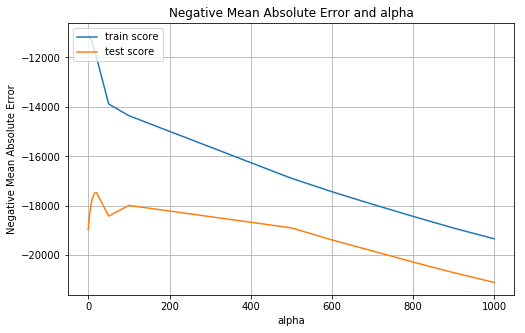

In [55]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.figure(figsize=(8,5))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.grid(True)
plt.show()

`from the graph the optimum value of alpha is 200`

In [56]:
alpha =15

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=15, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [57]:
len(lasso.coef_)

244

In [58]:
lasso_coeff = list(zip(X_train.columns, sorted(abs(lasso.coef_),reverse=True)))
pd.DataFrame(ridge_coeff, columns={'Feature','Coefficient'}).head(10)

,Feature,Coefficient
0,MSSubClass,25988.285136
1,LotArea,22898.700575
2,MasVnrArea,22030.424476
3,BsmtFinSF1,19807.021828
4,BsmtFinSF2,19680.359982
5,BsmtUnfSF,18947.972392
6,TotalBsmtSF,18014.212625
7,1stFlrSF,17592.641216
8,2ndFlrSF,17389.093937
9,LowQualFinSF,16345.465132


# Model Building and Evaluation

#### `Function to Calculate VIF`

In [59]:
# Function to create a dataframe that will contain the names of all the feature variables and their respective VIFs

def calculate_VIF(data_frame):
    vif = pd.DataFrame(columns = ['Features', 'VIF'])
    vif['Features'] = data_frame.columns
    vif['VIF'] = [variance_inflation_factor(data_frame.values, i) for i in range(data_frame.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

### Model 1

In [60]:
X_train_1 = X_train

# Add a constant
X_train_1 = sm.add_constant(X_train_1)

# Create Model1
lr1 = sm.OLS(y_train, X_train_1).fit()
print(lr1.params)
print(lr1.summary())

const                   -621985.769712
MSSubClass                  -38.002472
LotArea                       0.676122
MasVnrArea                   14.984969
BsmtFinSF1                   14.782470
BsmtFinSF2                    9.793267
BsmtUnfSF                    -2.677487
TotalBsmtSF                  21.898249
1stFlrSF                     25.445275
2ndFlrSF                     40.796064
LowQualFinSF                -30.147451
GrLivArea                    36.093896
BsmtFullBath               1354.608443
BsmtHalfBath              -1221.234436
FullBath                   1813.169666
HalfBath                  -2469.678547
BedroomAbvGr              -2221.698761
KitchenAbvGr             -16197.468682
TotRmsAbvGrd               -589.172939
Fireplaces                 1567.578607
GarageCars                 3382.834643
GarageArea                    9.696322
WoodDeckSF                    4.354242
OpenPorchSF                  26.517745
EnclosedPorch                 5.975688
3SsnPorch                

In [61]:
# Model1 VIF
vif_cols = calculate_VIF(X_train)
vif_cols

,Features,VIF
243,SaleCondition_Partial,inf
99,OverallQual_10,inf
131,Exterior1st_CBlock,inf
128,Exterior1st_AsphShn,inf
115,OverallCond_9,inf
114,OverallCond_8,inf
113,OverallCond_7,inf
112,OverallCond_6,inf
111,OverallCond_5,inf
110,OverallCond_4,inf


In [62]:
cols_to_drop1= ['Exterior2nd_Other', 'ExterCond_Po', 'Electrical_Mix']
X_train.drop(cols_to_drop1, axis=1, inplace = True)

In [63]:
vif_drop_columns = vif_cols[vif_cols['VIF'] >= 1.7]['Features']

In [64]:
for varibale in vif_drop_columns:
    X_train.drop([varibale], axis=1, inplace = True)

In [65]:
X_train.shape

(1021, 19)

### Model 2

In [66]:
X_train_2 = X_train

# Add a constant
X_train_2 = sm.add_constant(X_train_2)

# Create Model2
lr2 = sm.OLS(y_train, X_train_2).fit()
print(lr2.params)
print(lr2.summary())

const                   157046.315809
BsmtHalfBath            -10961.519502
WoodDeckSF                 221.148187
3SsnPorch                  169.665184
ScreenPorch                193.601055
MiscVal                     -3.708938
LotShape_IR2             37966.143770
Utilities_NoSeWa        -53693.842224
LotConfig_FR2            -1548.508521
LotConfig_FR3             1766.866864
Neighborhood_Blueste    -41651.173981
Condition1_RRNe         -43321.556817
Foundation_Wood          -9800.652635
HeatingQC_Po            -70046.315809
SaleType_CWD             34428.360750
SaleType_Con             80376.622924
SaleType_ConLI          -38874.429595
SaleType_ConLw          -20070.975586
SaleType_Oth            -60859.171861
SaleCondition_Family    -27091.947808
dtype: float64
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:            

In [67]:
# Model2 VIF
vif_cols = calculate_VIF(X_train)
vif_cols

,Features,VIF
2,3SsnPorch,1.09
1,WoodDeckSF,1.09
0,BsmtHalfBath,1.08
5,LotShape_IR2,1.07
11,Foundation_Wood,1.07
7,LotConfig_FR2,1.06
3,ScreenPorch,1.04
6,Utilities_NoSeWa,1.04
10,Condition1_RRNe,1.03
13,SaleType_CWD,1.02


In [68]:
cols_to_drop2 = ['LotConfig_FR3', 'LotConfig_FR2']
X_train.drop(cols_to_drop2, axis=1, inplace = True)

### Model 3

In [69]:
X_train_3 = X_train

# Add a constant
X_train_3 = sm.add_constant(X_train_3)

# Create Model3
lr3 = sm.OLS(y_train, X_train_3).fit()
print(lr3.params)
print(lr3.summary())

const                   157018.316684
BsmtHalfBath            -11012.659331
WoodDeckSF                 221.085032
3SsnPorch                  169.352099
ScreenPorch                193.766138
MiscVal                     -3.707053
LotShape_IR2             37751.447587
Utilities_NoSeWa        -53653.167394
Neighborhood_Blueste    -41613.006805
Condition1_RRNe         -43240.069630
Foundation_Wood          -9614.608555
HeatingQC_Po            -70018.316684
SaleType_CWD             34468.333583
SaleType_Con             80413.811188
SaleType_ConLI          -39363.102676
SaleType_ConLw          -19970.549254
SaleType_Oth            -60824.415087
SaleCondition_Family    -27055.988215
dtype: float64
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.138
Method:                 Least Squares   F-statistic:            

In [70]:
# Model3 VIF
vif_cols = calculate_VIF(X_train)
vif_cols

,Features,VIF
0,BsmtHalfBath,1.08
1,WoodDeckSF,1.08
2,3SsnPorch,1.08
9,Foundation_Wood,1.07
5,LotShape_IR2,1.05
3,ScreenPorch,1.04
6,Utilities_NoSeWa,1.04
8,Condition1_RRNe,1.03
11,SaleType_CWD,1.02
16,SaleCondition_Family,1.02


In [71]:
cols_to_drop3 = ['SaleType_ConLw', 'Foundation_Wood', 'Neighborhood_Blueste', 'Utilities_NoSeWa', 'Condition1_RRNe']
X_train.drop(cols_to_drop3, axis=1, inplace = True)

# Model 4

In [72]:
X_train_4 = X_train

# Add a constant
X_train_4 = sm.add_constant(X_train_4)

# Create Model4
lr4 = sm.OLS(y_train, X_train_4).fit()
print(lr4.params)
print(lr4.summary())

const                   156966.488370
BsmtHalfBath            -11871.305451
WoodDeckSF                 220.347212
3SsnPorch                  157.824656
ScreenPorch                190.292866
MiscVal                     -3.693188
LotShape_IR2             37233.517734
HeatingQC_Po            -69966.488370
SaleType_CWD             34767.072646
SaleType_Con             80572.992257
SaleType_ConLI          -39314.971598
SaleType_Oth            -60693.640074
SaleCondition_Family    -26802.794526
dtype: float64
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.150
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     14.88
Date:                Mon, 16 Dec 2019   Prob (F-statistic):           4.58e-29
Time:                        23:43:29   Log-Likelihood:                -12880.
No. Observations:

In [73]:
# Model4 VIF
vif_cols = calculate_VIF(X_train)
vif_cols

,Features,VIF
1,WoodDeckSF,1.07
0,BsmtHalfBath,1.06
5,LotShape_IR2,1.03
3,ScreenPorch,1.02
7,SaleType_CWD,1.02
11,SaleCondition_Family,1.02
2,3SsnPorch,1.01
4,MiscVal,1.00
6,HeatingQC_Po,1.00
8,SaleType_Con,1.00


# Residual Analysis of the Training Data

In [74]:
y_train_price = lr4.predict(X_train_4)

Text(0.5, 0, 'Errors')

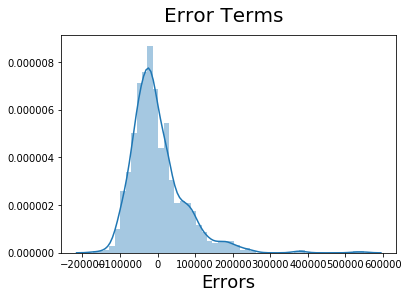

In [75]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 50)
# Plot heading 
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)   

In [76]:
X_train.columns

Index(['BsmtHalfBath', 'WoodDeckSF', '3SsnPorch', 'ScreenPorch', 'MiscVal',
       'LotShape_IR2', 'HeatingQC_Po', 'SaleType_CWD', 'SaleType_Con',
       'SaleType_ConLI', 'SaleType_Oth', 'SaleCondition_Family'],
      dtype='object')

In [77]:
X_test_m4 =  X_test[['BsmtHalfBath', 'WoodDeckSF', '3SsnPorch', 'ScreenPorch', 'MiscVal',
       'LotShape_IR2', 'HeatingQC_Po', 'SaleType_CWD', 'SaleType_Con',
       'SaleType_ConLI', 'SaleType_Oth', 'SaleCondition_Family']]
X_test_m4.head()

,BsmtHalfBath,WoodDeckSF,3SsnPorch,ScreenPorch,MiscVal,LotShape_IR2,HeatingQC_Po,SaleType_CWD,SaleType_Con,SaleType_ConLI,SaleType_Oth,SaleCondition_Family
1436,0,0,0,0,0,0,0,0,0,0,0,0
57,0,0,0,0,0,0,0,0,0,0,0,0
780,0,220,0,0,0,0,0,0,0,0,0,0
382,0,144,0,0,0,0,0,0,0,0,0,0
1170,0,203,0,0,0,0,0,0,0,0,0,0


In [78]:
# Adding  constant variable to test dataframe
X_test_m4 = sm.add_constant(X_test_m4)

y_pred_m4 = lr4.predict(X_test_m4)

In [79]:
y_pred_m4.shape

(438,)

In [80]:
y_test.shape

(438,)

# Model Evaluation

Text(0, 0.5, 'SalePrice')

<Figure size 432x288 with 0 Axes>

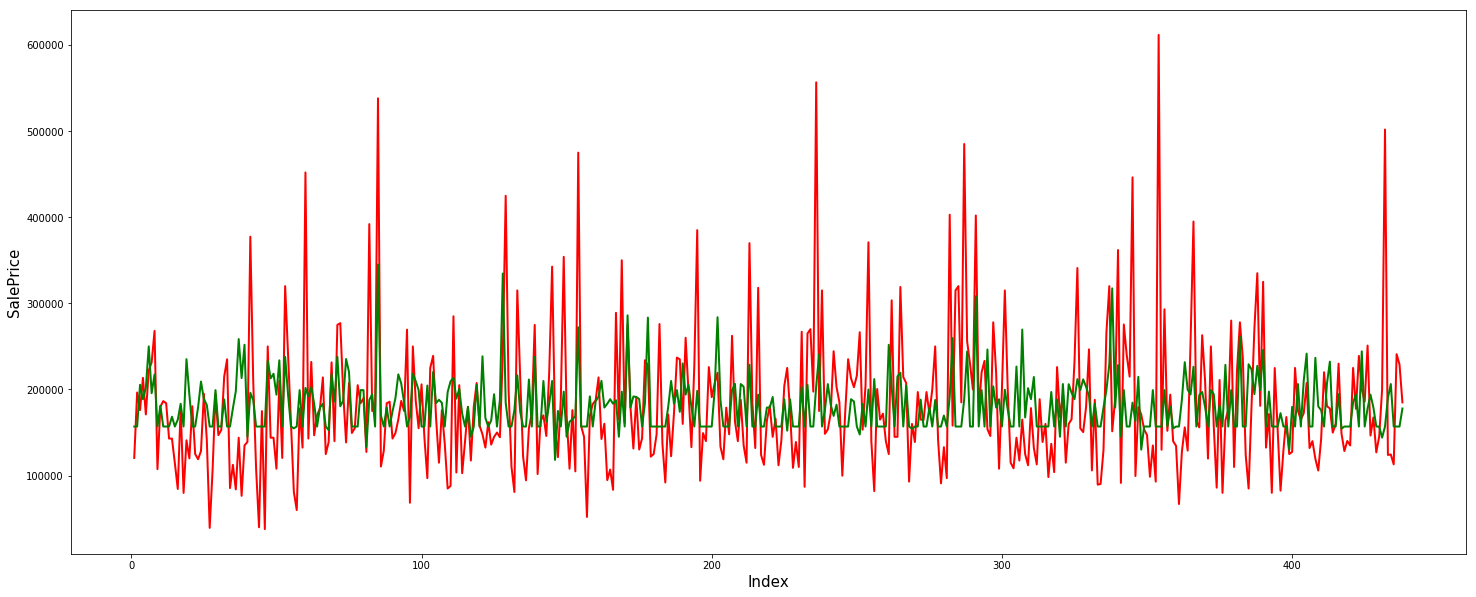

In [81]:
# Actual vs Predicted
c = [i for i in range(1,439,1)]

fig = plt.figure()
plt.figure(figsize = (25, 10))

plt.plot(c,y_test, color="red", linewidth=2, linestyle="-")     
plt.plot(c,y_pred_m4, color="green",  linewidth=2, linestyle="-")  

fig.suptitle('Actual vs Predicted', fontsize=15)              

plt.xlabel('Index', fontsize=15)                              
plt.ylabel('SalePrice', fontsize=15)  

 # R-squared score on the test set.

In [82]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_m4)

0.11997714257871595

`Not a  Good Fit`